In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Normalização de Histogram

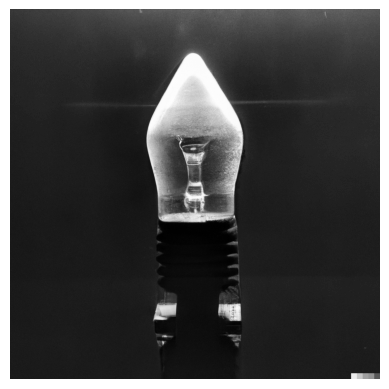

In [40]:
image = cv2.imread('grayscale_ilum_var.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

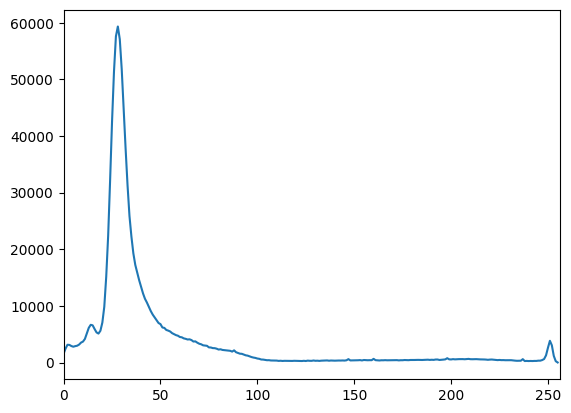

In [41]:
hist, bins = np.histogram(image.flatten(), 256, [0,256])

plt.plot(hist)
plt.xlim([0, 256])
plt.show()

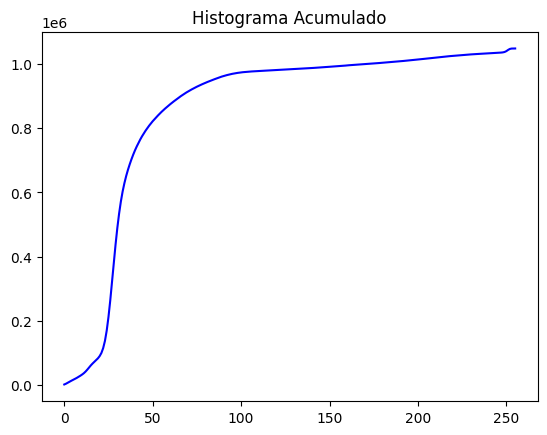

In [42]:
# exibe o histograma acumulado
cdf = np.zeros_like(hist)
cdf[0] = hist[0]
for i in range(1, 256):
    cdf[i] = cdf[i-1] + hist[i]

plt.plot(cdf, color='b')
plt.title('Histograma Acumulado')
plt.show()

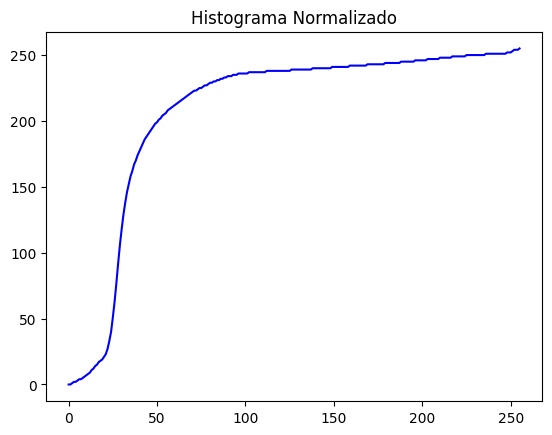

In [43]:
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
# Passo 4: normalizar a CDF para o intervalo [0, 255]
cdf_normalized = np.uint8(cdf_normalized)
plt.plot(cdf_normalized, color='b')
plt.title('Histograma Normalizado')
plt.show()

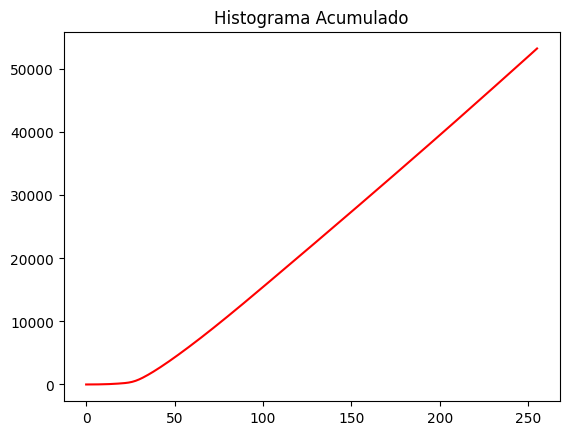

In [44]:
# exibe o histograma acumulado
cdf_accumulated = np.cumsum(cdf_normalized)
plt.plot(cdf_accumulated, color='r')

plt.title('Histograma Acumulado')
plt.show()

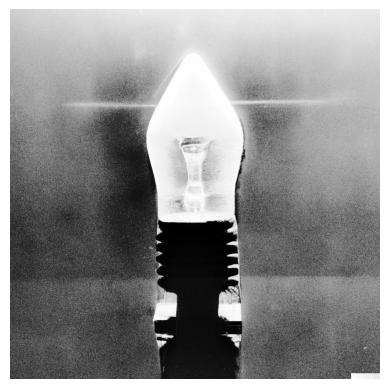

In [45]:
# Passo 5: criar uma nova imagem com todos os pixels inicializados com valor zero
new_image = np.zeros_like(image)

for i in range(256):
    new_image[image == i] = cdf_normalized[i]

plt.imshow(new_image, cmap='gray')
plt.axis('off')
plt.show()

## Gradiente

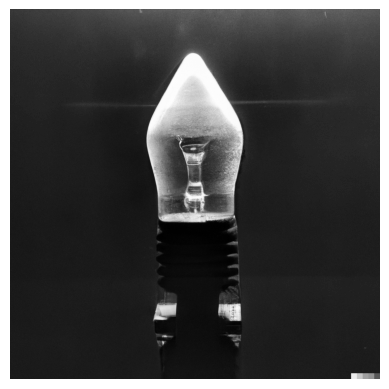

In [46]:
image = cv2.imread('grayscale_ilum_var.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

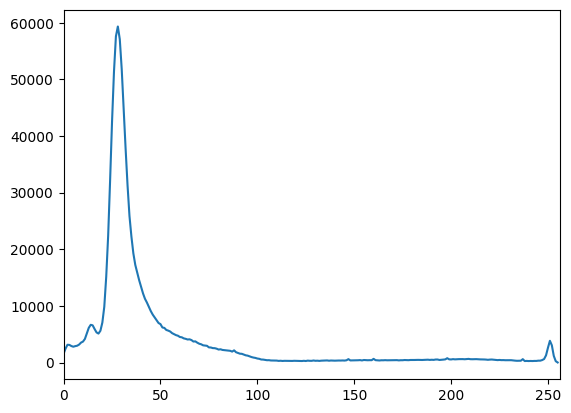

In [47]:
hist, bins = np.histogram(image.flatten(), 256, [0,256])

plt.plot(hist)
plt.xlim([0, 256])
plt.show()

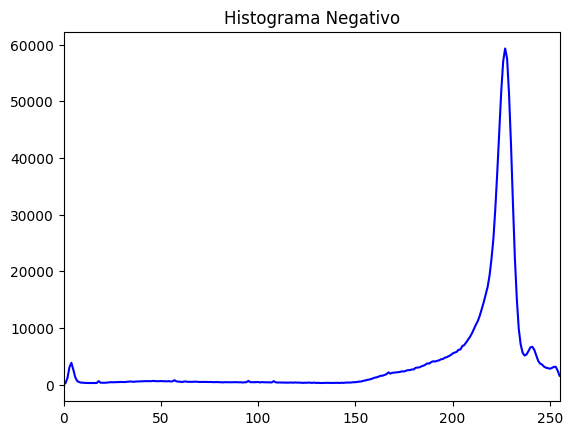

In [49]:
# Calcula o negativo da imagem
neg = 255 - image

hist_neg, bins = np.histogram(neg.ravel(), bins=256, range=(0, 256))
plt.plot(hist_neg, color='b')
plt.xlim([0, 255])
plt.title('Histograma Negativo')
plt.show()

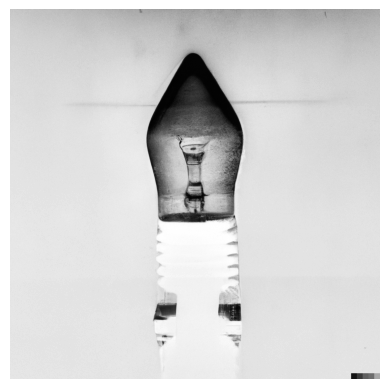

In [51]:
new_neg = np.zeros_like(neg)

for i in range(256):
    new_neg[neg == i] = 255 - i

# Calcula o negativo da nova imagem
new_img = 255 - new_neg

# Plota a imagem
plt.imshow(new_img, cmap='gray')
plt.axis('off')
plt.show()